## Task 1

In [71]:
import paramiko 
import re

host = '192.168.56.101'
user = 'anya'
password = 'anya'
port = 22

client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=password, port=port)
stdin, stdout, stderr = client.exec_command('cat /etc/services')
data = stdout.readlines()   
client.close()

   
    
regexp = re.compile("\s5\d{3}/udp") 

print(f'{"Service:":>13}\t {"Port:":>10}\n')
for line in data:
        if(regexp.search(line)):
            print(f'{line.split()[0]:>13}\t{line.split()[1]:>10} ')



     Service:	      Port:

          rfe	  5002/udp 
         mmcc	  5050/udp 
          sip	  5060/udp 
      sip-tls	  5061/udp 
          aol	  5190/udp 
  xmpp-client	  5222/udp 
  xmpp-server	  5269/udp 
     cfengine	  5308/udp 
         mdns	  5353/udp 
   postgresql	  5432/udp 
      freeciv	  5556/udp 
         amqp	  5672/udp 
          ggz	  5688/udp 
       noclog	  5354/udp 
      hostmon	  5355/udp 
        rplay	  5555/udp 


## Task 2


            

        
        
        

In [63]:
import sqlite3

client = paramiko.SSHClient()
client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
client.connect(hostname=host, username=user, password=password, port=port)
stdin, stdout, stderr = client.exec_command('dpkg -l')
data = stdout.readlines()   
client.close()


packages = []
versions = []
architectures = []
descs = []


for i,line in enumerate(data):
    if i<5:
         continue           
    words=line.split()
      
    packages.append(words[1])
    versions.append(words[2])
    architectures.append(words[3])
    desc = ' '.join(words[4:])
    descs.append(desc.replace('\"','\''))


con = sqlite3.connect('rudkovskaia.db')
c = con.cursor()

c.execute('DROP TABLE packages')
c.execute('CREATE TABLE packages (name text, versions text, architecture text, desc text)')

for i in range(len(packages)):
    sql = f'INSERT INTO packages (name, versions, architecture, desc) VALUES ("{packages[i]}", "{versions[i]}", "{architectures[i]}", "{descs[i]}")'
    c.execute(sql)
    
con.commit



<function Connection.commit>

In [64]:
c.execute('SELECT * FROM packages WHERE name like "r%" and versions like "%ubuntu%"')
print('{:>10} \t{:>20}\t {:>10} \t {:>30}\n'.format(*['package name','version','architecture','description']))
for line in c.fetchall():
    print('{:>10} \t{:>20} \t{:>10} \t {:>30}'.format(*line))
c.close
con.close()



package name 	             version	 architecture 	                    description

   rsyslog 	   8.1901.0-1ubuntu4 	     amd64 	 reliable system and kernel logging daemon
   run-one 	       1.17-0ubuntu1 	       all 	 run just one instance of a command and its args at a time


## Task 3


In [10]:
import requests
import csv
import pandas as pd
import matplotlib


    
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [35]:
'''print(len(df))
print(len(df.Rank))
print(len(str(df.Rank)+df.Name))
print(len(set(df.Name+df.Platform)))
print(len(set(df.Name+df.Platform+str(df.Year))))
print(len(set(df.Name+df.Platform+str(df.Year)+df.Genre)))
print(len(set(df.Name+df.Platform+str(df.Year)+df.Publisher)))'''
df[df.Rank>179]
df.to_csv('vgsales2.csv', index=False) 


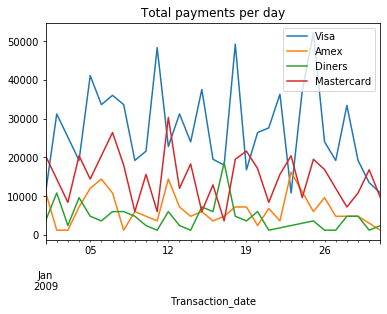

In [62]:
for i,paytype in enumerate(set(df.Payment_Type)):
    if i==0:
        ax = df[df.Payment_Type==paytype][['Price','Payment_Type','Transaction_date']].groupby(df['Transaction_date'].dt.normalize()).sum().plot(title='Total payments per day')
        continue
    df[df.Payment_Type==paytype][['Price','Payment_Type','Transaction_date']].groupby(df['Transaction_date'].dt.normalize()).sum().plot(ax=ax)

ax.legend(set(df.Payment_Type)